# Мультикласова класифікація

У цьому домашньому завданні ми будемо працювати з наступним набором даних:
https://archive.ics.uci.edu/ml/datasets/car+evaluation

Ми передбачимо клас автомобілів відповідно до його характеристик. Клас може бути unacceptable, acceptable, good, very good.

Ми завантажуємо набір даних з hw_5_data.csv, наданого вам для виконання домашнього завдання.

0. Розташуйте всі імпорти під цією секцією.

In [1]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

1.1. Завантажте набір даних у змінну df за допомогою Pandas. Виведіть перші 5 записів та форму набору даних.

In [2]:
df = pd.read_csv('hw_5_data.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.shape #форма набору даних

(1727, 7)

1.2. Набір даних не має імен стовпців. Дайте наступні імена стовпцям:
`['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']`

In [4]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('hw_5_data.csv', names=column_names)
print(df.head(5))
print(df.shape)

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
(1728, 7)


2. Виведіть кількість унікальних значень кожної з незалежних змінних програмно. Формат числовий, а не візуальний. Приклад відповіді для одного стовпця:
```
med      432
high     432
vhigh    432
low      432
Name: buying, dtype: int64
```
Необхідно, щоб були назви стовпців, назви значень та кількість рядків із цим значенням.

In [5]:
for column in column_names:
    value_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print("-----")

Column: buying
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
-----
Column: maint
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
-----
Column: doors
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
-----
Column: persons
2       576
4       576
more    576
Name: persons, dtype: int64
-----
Column: lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64
-----
Column: safety
low     576
med     576
high    576
Name: safety, dtype: int64
-----
Column: class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64
-----


3. Виведіть скільки рядків відповідають кожному із значень цільової змінної. Дайте відповіді на два наступні запитання:   
  3.1. Ця змінна ординальна (порядкова) чи номінальна? Чому?
  
  3.2. Класифікація у цьому випадку буде збалансована чи незбалансована? Чому?

In [6]:
value_counts = df["class"].value_counts()
print(f"Column: {column}")
print(value_counts)

Column: class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


3.1. Змінна є ординальною, так як значення можна впорядкувати між собою (є ієрархія) - неприйнятна, прийнятна, хороша, дуже хороша.
3.2. Незбалансована, так як рядків з unacc класом ледь не в 10-20 разів більше ніж прикладів інших змінних. моделі буде важко навчитись розпізнавати інші класи крім неприйнятного. 

4. Перевірте, чи відсутні значення у всіх змінних завантажених набору даних.

In [7]:
missing_values = df.isnull().any()
missing_counts = df.isnull().sum()
missing_values
missing_counts

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

нема пропущених змінних.

5.1. Запишіть у змінну `x` всі незалежні змінні, у змінну `y` - цільову.


In [8]:
x = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df['class']

5.2. Розбийте дані на тренувальний та тестовий набори (ми знову ігноруємо валідацію для спрощення завдання). Визначте random_state рівним 42 та test_size рівним 0.33.

In [9]:
x_train_df, x_test_df, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

5.3. Виведіть форму та перші 5 записів отриманих x_train_df, x_test_df.

In [10]:
print("Форма x_train_df:", x_train_df.shape)
print("Перші 5 записів x_train_df:")
print(x_train_df.head())
print("------------------------------------------------")
print("Форма x_test_df:", x_test_df.shape)
print("Перші 5 записів x_test_df:")
print(x_test_df.head())

Форма x_train_df: (1157, 6)
Перші 5 записів x_train_df:
     buying  maint  doors persons lug_boot safety
48    vhigh  vhigh      3    more      med    low
468    high  vhigh      3       4    small    low
155   vhigh   high      3    more    small   high
1721    low    low  5more    more    small   high
1208    med    low      2    more    small   high
------------------------------------------------
Форма x_test_df: (571, 6)
Перші 5 записів x_test_df:
     buying maint  doors persons lug_boot safety
599    high  high      4       2      med   high
1201    med   low      2       4      med    med
628    high  high  5more       2      big    med
1498    low  high  5more       4      med    med
1263    med   low      4    more      med    low


6.1. Виведіть типи даних усіх змінних у x_train.

In [11]:
x_train_df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

6.2. Усі незалежні змінні у нас ординальні. Закодуйте всі незалежні змінні за допомогою відповідного методу з sklearn.preprocessing.  
Вам необхідно встановити правильний порядок значень для кожної змінної при кодуванні так, щоб значення після кодування були впорядковані в порядку зростання.
Кодування значень {'high':1,'low':2,'med':3} буде ввжатись неправильним виконанням завдання.
Подумайте, як коректно застосовувати енкодер на трен. та тест. даних.
Результат кодування x_train_df та x_test_df запишіть відповідно у x_train, x_test.

In [12]:
# Створення екземпляра OrdinalEncoder та задання порядку категорій
encoder = OrdinalEncoder(categories=[
    ['low', 'med', 'high', 'vhigh'],
    ['low', 'med', 'high', 'vhigh'],
    ['2', '3', '4', '5more'],
    ['2', '4', 'more'],
    ['small', 'med', 'big'],
    ['low', 'med', 'high']
])

# Закодування незалежних змінних у x_train_df
x_train_encoded = encoder.fit_transform(x_train_df)

# Закодування незалежних змінних у x_test_df
x_test_encoded = encoder.transform(x_test_df)

# Збереження результатів у x_train та x_test
x_train = pd.DataFrame(x_train_encoded, columns=x_train_df.columns)
x_test = pd.DataFrame(x_test_encoded, columns=x_test_df.columns)

6.3. Виведіть перші 5 записів x_train, x_test.

In [13]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,1.0,2.0,1.0,0.0
1,2.0,3.0,1.0,1.0,0.0,0.0
2,3.0,2.0,1.0,2.0,0.0,2.0
3,0.0,0.0,3.0,2.0,0.0,2.0
4,1.0,0.0,0.0,2.0,0.0,2.0


In [14]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
0,2.0,2.0,2.0,0.0,1.0,2.0
1,1.0,0.0,0.0,1.0,1.0,1.0
2,2.0,2.0,3.0,0.0,2.0,1.0
3,0.0,2.0,3.0,1.0,1.0,1.0
4,1.0,0.0,2.0,2.0,1.0,0.0


6.4. Виведіть отримані категорії енкодера.

In [15]:
# Виведення категорій
for i, column in enumerate(x_train_df.columns):
    print("Категорії для змінної", column)
    category_dict = {value: index + 1 for index, value in enumerate(encoder.categories_[i])}
    print(category_dict)
    print()

Категорії для змінної buying
{'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}

Категорії для змінної maint
{'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}

Категорії для змінної doors
{'2': 1, '3': 2, '4': 3, '5more': 4}

Категорії для змінної persons
{'2': 1, '4': 2, 'more': 3}

Категорії для змінної lug_boot
{'small': 1, 'med': 2, 'big': 3}

Категорії для змінної safety
{'low': 1, 'med': 2, 'high': 3}



7.1. Навчіть на отриманих даних логістичну регресію c random_state=42 та іншими параметрами по замовчуванню.

In [16]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

7.2. Зробіть прогнози за допомогою отриманої моделі за допомогою методу predict. 

In [17]:
y_pred = logreg.predict(x_test)

7.3. Виведіть метрики якості за допомогою classification_report.

In [18]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         acc       0.65      0.58      0.61       129
        good       0.55      0.30      0.39        20
       unacc       0.88      0.93      0.90       397
       vgood       0.78      0.72      0.75        25

    accuracy                           0.82       571
   macro avg       0.71      0.63      0.66       571
weighted avg       0.81      0.82      0.81       571



Accuracy у цьому пункті має бути близько 0.82. 

7.4. Яку метрику якості ви рекомендуєте використовувати для порівняння різних моделей та вибору найкращої? Чому? Метрика - це одне число, що характеризує якість передбачень моделі.

так як класи незбалансовані, то краще звернути увагу на  precision або   recall або f1-score. я оберу f1-score, так як він враховує як точність, так і повноту моделі і є добрим показником збалансованості між цими двома метриками. F1-score особливо корисний, коли маємо справу з незбалансованими класами.

8.1. Навчіть Decision Tree з sklearn з глибиною 4 за тими ж даними. Обчисліть прогнози, знайдіть метрику якості на test даних. Порівняйте з регресією логістики. Яка модель краща?

In [19]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Навчання моделі на навчальних даних
tree_model.fit(x_train, y_train)

# Прогнозування на тестових даних
y_pred = tree_model.predict(x_test)

# Обчислення метрик якості
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         acc       0.68      0.79      0.73       129
        good       0.38      0.60      0.46        20
       unacc       0.96      0.94      0.95       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.85       571
   macro avg       0.50      0.58      0.54       571
weighted avg       0.83      0.85      0.84       571



у модеді tree_model трошки вища accuracy ніж у логістичної регресії, проте для незбалансованих класів краще звернутись на іншу метрику - f1-score)

tree_model має кращі показники для всіх класів  f1-score ніж логістична регресія, окрім vgood - цей клас чомусь взагалі не може визначити модель......

8.2. Виведіть параметри моделі Decision Tree.

In [20]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

<font color='blue'>**[Optional]**</font> 8.3. Візуалізуйте отримане дерево в будь-якому з існуючих методів. Зображення повинно мати графік з критеріями у вузлах, класах та кількості елементів у кожному аркуші.

In [21]:
# # Експортуємо дерево рішень в DOT-формат
# dot_data = export_graphviz(tree_model, out_file=None, filled=True, rounded=True, special_characters=True)

# # Створюємо графік з DOT-коду
# graph = pydotplus.graph_from_dot_data(dot_data)

# # Візуалізуємо графік
# Image(graph.create_png())

9.1. Виконайте пошук гіперпараметрів для DecisionTree за сіткою за допомогою sklearn. Встановіть сітку з параметрів самостійно на основі припущень, що може покращити роботу дерева.
Вам вдалося знайти модель, яка працює краще, ніж побудована у пункті 8.1?

In [22]:
# Створення екземпляра моделі Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# Визначення сітки параметрів
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Пошук гіперпараметрів за допомогою сітки
grid_search = GridSearchCV(tree_model, param_grid, scoring='f1_macro', cv=5)
grid_search.fit(x_train, y_train)

# Виведення найкращих параметрів
print("Найкращі параметри:", grid_search.best_params_)

# Прогнозування на тестових даних з найкращими параметрами
y_pred = grid_search.predict(x_test)

# Обчислення метрик якості
report = classification_report(y_test, y_pred)
print(report)

Найкращі параметри: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}
              precision    recall  f1-score   support

         acc       0.85      0.78      0.81       129
        good       0.55      0.85      0.67        20
       unacc       0.97      0.96      0.97       397
       vgood       0.79      0.88      0.83        25

    accuracy                           0.91       571
   macro avg       0.79      0.87      0.82       571
weighted avg       0.92      0.91      0.92       571



здається, модель стала кращою, оскільки клас vgood принаймні почала передбачати, і показники f1-score  для всіх класів покращились)

9.2. Виведіть claasification report фінальної моделі пошуку гіперпараметрів.

In [23]:
# Обчислення метрик якості
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         acc       0.85      0.78      0.81       129
        good       0.55      0.85      0.67        20
       unacc       0.97      0.96      0.97       397
       vgood       0.79      0.88      0.83        25

    accuracy                           0.91       571
   macro avg       0.79      0.87      0.82       571
weighted avg       0.92      0.91      0.92       571



9.3. Виведіть матрицю помилок для кращої моделі у пошуку гіперпараметрів. Відобразіть матрицю візуально (у вигляді графіка із зафарбованими за значеннями клітинами або у вигляді таблиці із зафарбовуванням фону).

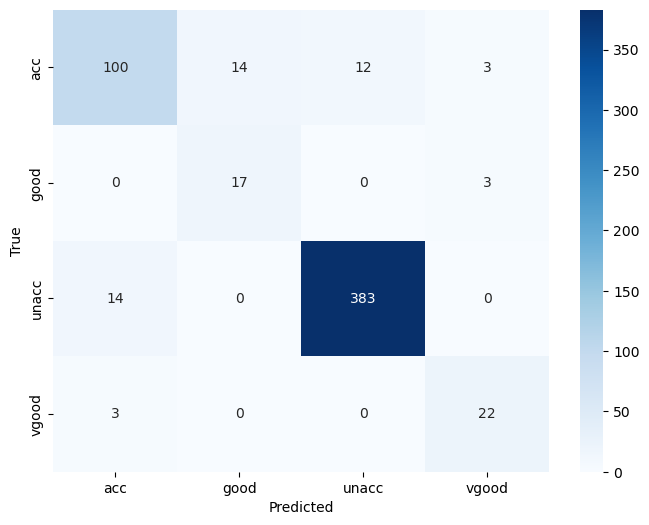

In [24]:
# Список назв класів
class_names = ['acc', 'good', 'unacc', 'vgood']

# Прогнози на тестових даних з найкращими параметрами
y_pred = grid_search.predict(x_test)

# Обчислення матриці помилок
cm = confusion_matrix(y_test, y_pred)

# Візуалізація матриці помилок у вигляді таблиці з зафарбовуванням фону
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

9.4. Зробіть висновок, які класи, з якими моделями найбільше плутаються?

    найбільше плутаються unacceptable з acceptable і навпаки, acceptable з  good - тобто найбільше плутаються сусідні класи